# Importing

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

### Instead of selecting 100 rows of data, I decided to take 1000 rows as it is better for analytical tasks

In [2]:
file_name =  "Dataset.xlsx"
sheet =  'Loan'

df = pd.read_excel(io=file_name, sheet_name=sheet)
df=df.head(1000) #Select first 1000 rows

# Data Processing & Analysis

## Select the given features

In [3]:
df=df[['loan_type', 'loan_amount', 'Interest_rate_spread', 'term', 'age','Status']]
df

,loan_type,loan_amount,Interest_rate_spread,term,age,Status
0,type1,116500,NaN,360.0,25-34,1
1,type2,206500,NaN,360.0,55-64,1
2,type1,406500,0.2000,360.0,35-44,0
3,type1,456500,0.6810,360.0,45-54,0
4,type1,696500,0.3042,360.0,25-34,0
...,...,...,...,...,...,...
995,type1,436500,0.3095,360.0,65-74,0
996,type2,456500,0.9229,360.0,35-44,0
997,type1,326500,0.9385,360.0,35-44,0
998,type2,176500,1.2598,360.0,55-64,0


## Label Frequency

In [4]:
df['Status'].value_counts()

0    741
1    259
Name: Status, dtype: int64

### ~74% data is label '0' and ~26% data is label '1'

### Data is quite imbalanced, so we might get some abnormal results for some algorithms

## Finding columns with missing data

In [5]:
df.isnull().any()

loan_type               False
loan_amount             False
Interest_rate_spread     True
term                    False
age                      True
Status                  False
dtype: bool

## Replacing missing data with Median/Mode Values

In [6]:
median_irs=df['Interest_rate_spread'].median()
df['Interest_rate_spread'] = df['Interest_rate_spread'].replace(np.nan, median_irs)

In [7]:
df['age'].value_counts()

45-54    238
35-44    221
55-64    205
25-34    140
65-74    127
>74       56
<25       11
Name: age, dtype: int64

In [8]:
df['age'] = df['age'].replace(np.nan, '45-54')

## Label Encoding

In [9]:
enc = LabelEncoder()

df['age'] = enc.fit_transform(df['age'])
df['loan_type'] = enc.fit_transform(df['loan_type'])


## Pair Plot

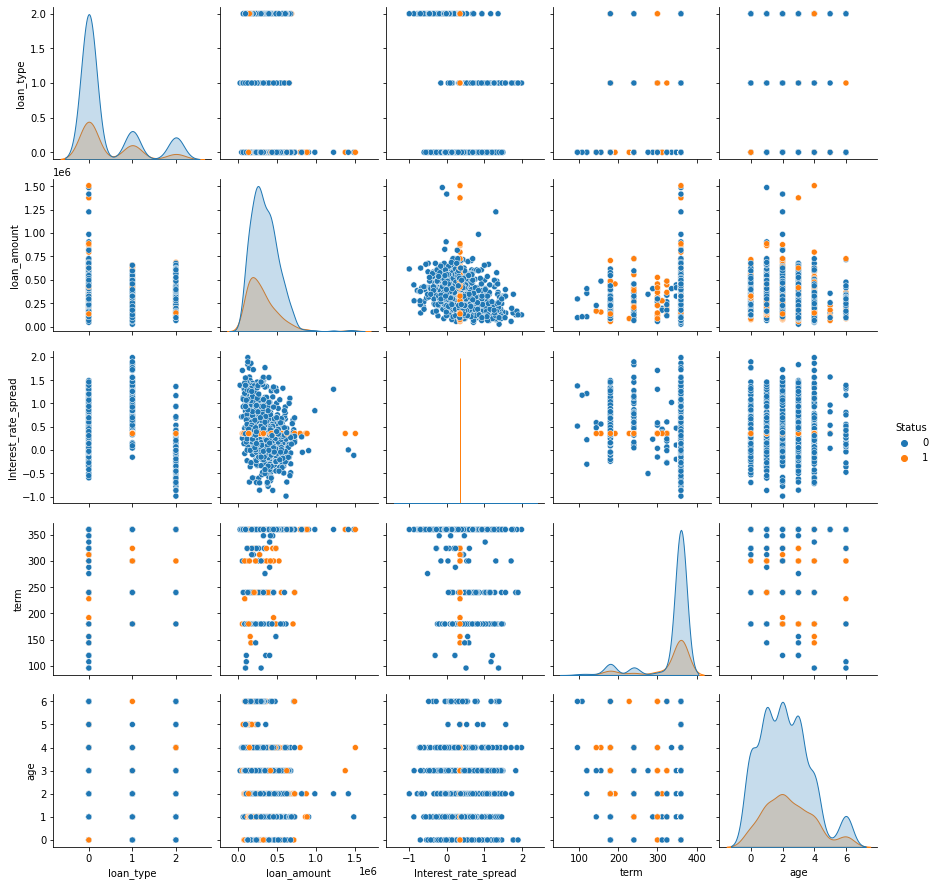

In [10]:
sns.pairplot(data=df, hue = 'Status')

## Correlation Matrix

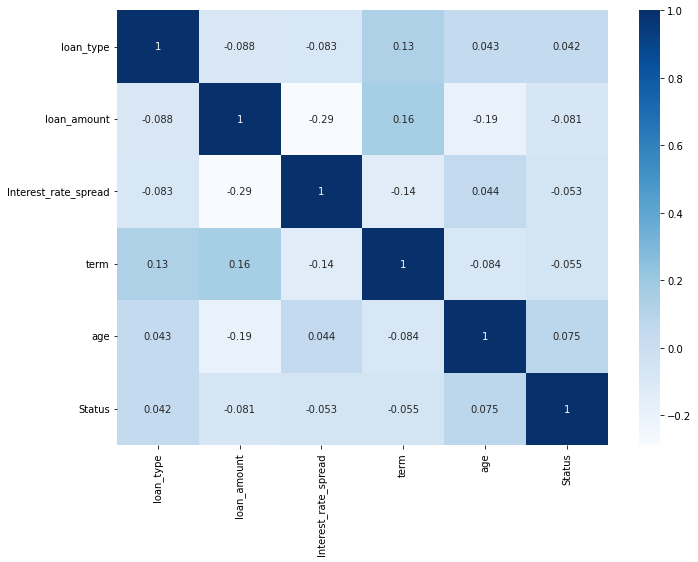

In [11]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

## Data Splitting - Train = 70% Test = 30%

In [12]:
target = df['Status']
df = df.drop('Status', axis =1)


X = df
Y = target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)  

# Classification Algorithms

# 1. Logistic Regression

In [13]:
from sklearn import linear_model

lgc = linear_model.LogisticRegression(random_state = 0,solver = 'liblinear')
lgc.fit(X_train, y_train)
y_pred = lgc.predict(X_test)

### Train vs Test Score

In [14]:
print(lgc.score(X_train, y_train))
print(lgc.score(X_test, y_test))

0.7414285714285714
0.74


### Almost no overfitting but equal to the percentage of class '0' data

## Checking if the model only predicts one label

In [15]:
print(set(y_test) - set(y_pred))

{1}


### We can see that the model is not predicting anything labelling class '1'
## Therefore, Logistic Regression only predicts label '0'

## Classification Report for Logistic Regression

In [16]:
print("Report : ",classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.74      1.00      0.85       222
           1       0.00      0.00      0.00        78

    accuracy                           0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300



## Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Accuracy Score: 74.00')

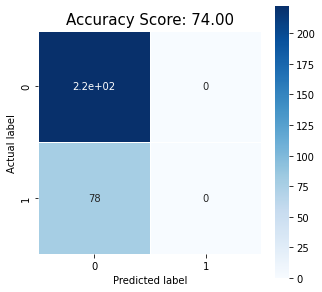

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

## ROC Curve and AUC Score for Logistic Regression

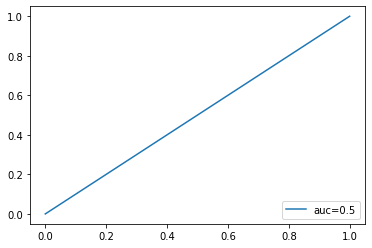

In [18]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 2. Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100) 

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

### Train vs Test Score

In [20]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.99


### Almost no overfitting

## Classification Report for Random Forest Classifier

In [21]:
print("Report : ",classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99       222
           1       0.96      1.00      0.98        78

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



## Confusion Matrix for Random Forest Classifier

Text(0.5, 1.0, 'Accuracy Score: 99.00')

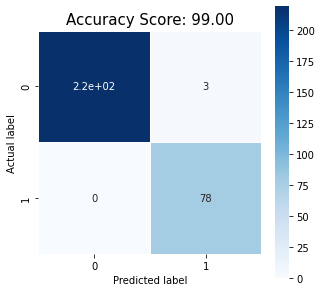

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

## ROC Curve and AUC Score for Random Forest Classifier

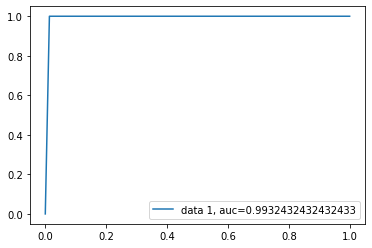

In [23]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# K-Nearest Neighbors

## Looping the process to find the best value of n_neighbors

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
  
    training_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    

In [25]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.8585714285714285, 0.6933333333333334]
3 : [0.84, 0.6533333333333333]
4 : [0.81, 0.7]
5 : [0.7914285714285715, 0.6733333333333333]
6 : [0.7814285714285715, 0.7]
7 : [0.7728571428571429, 0.68]
8 : [0.76, 0.7133333333333334]
9 : [0.76, 0.7066666666666667]
10 : [0.7571428571428571, 0.71]
11 : [0.7528571428571429, 0.6966666666666667]
12 : [0.7471428571428571, 0.71]
13 : [0.7514285714285714, 0.6933333333333334]
14 : [0.7542857142857143, 0.7066666666666667]
15 : [0.7514285714285714, 0.7]
16 : [0.7471428571428571, 0.72]
17 : [0.7542857142857143, 0.7166666666666667]
18 : [0.7585714285714286, 0.7233333333333334]
19 : [0.7542857142857143, 0.72]
20 : [0.75, 0.7266666666666667]


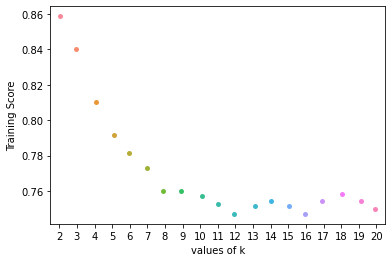

In [26]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

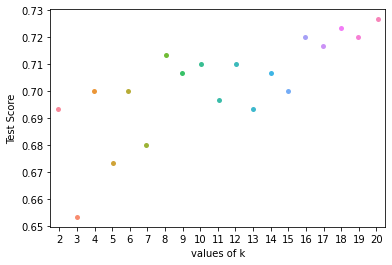

In [27]:

ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

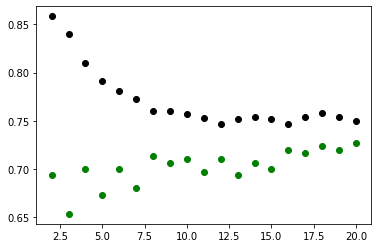

In [28]:

plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

## From the graphs above we can conclude that n_neighbors = 20 gives result with the least overfitting 

In [29]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Train vs Test Score

In [30]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.75
0.7266666666666667


### Noticable Overfitting

## Classification Report for K-Nearest Neighbors

In [31]:
print("Report : ",classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.75      0.95      0.84       222
           1       0.38      0.08      0.13        78

    accuracy                           0.73       300
   macro avg       0.56      0.52      0.48       300
weighted avg       0.65      0.73      0.65       300



## Confusion Matrix for K-Nearest Neighbors

Text(0.5, 1.0, 'Accuracy Score: 72.67')

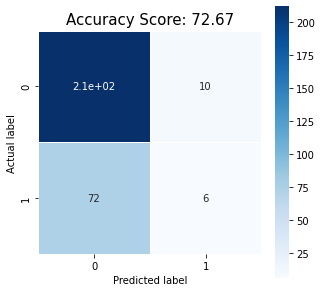

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

## ROC Curve and AUC Score for K-Nearest Neighbors

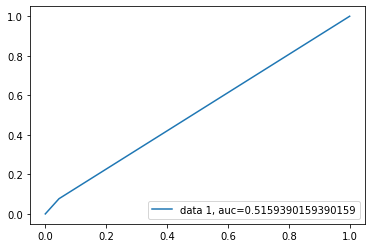

In [33]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Naive Bayes

### Dataset contains continuous valued features - Therefore Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

### Train vs Test Score

In [35]:
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))

0.7414285714285714
0.7333333333333333


### Slightly Overfitting

## Classification Report for Naive Bayes

In [36]:
print("Report : ",classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.74      0.99      0.85       222
           1       0.25      0.01      0.02        78

    accuracy                           0.73       300
   macro avg       0.49      0.50      0.43       300
weighted avg       0.61      0.73      0.63       300



## Confusion Matrix for Naive Bayes

Text(0.5, 1.0, 'Accuracy Score: 73.33')

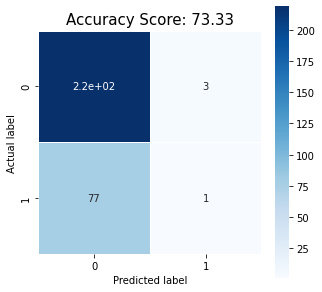

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

## ROC Curve and AUC Score for Naive Bayes

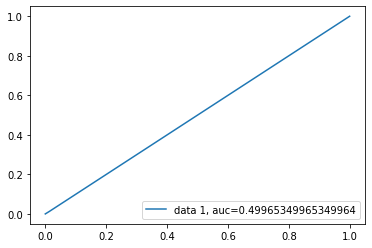

In [38]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Support Vector Machine

In [39]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

### Train vs Test Score

In [40]:
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.7414285714285714
0.74


### Almost no overfitting but equal to the percentage of class '0' data

## Checking if the model only predicts one label

In [41]:
print(set(y_test) - set(y_pred))

{1}


### We can see that the model is not predicting anything labelling class '1'
## Therefore, Support Vector Machine only predicts label '0'

## Classification Report for Support Vector Machine

In [42]:
print("Report : ",classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.74      1.00      0.85       222
           1       0.00      0.00      0.00        78

    accuracy                           0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300



## Confusion Matrix for Support Vector Machine

Text(0.5, 1.0, 'Accuracy Score: 74.00')

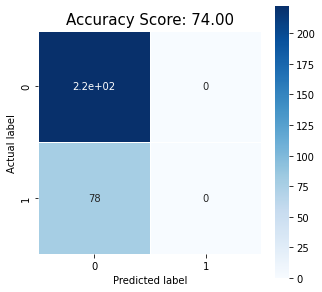

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

## ROC Curve and AUC Score for Support Vector Machine

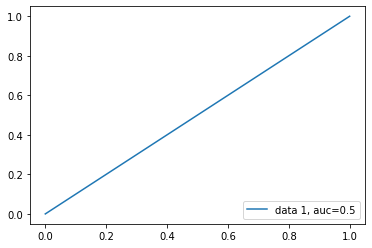

In [44]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Model Comparison

### 1. Logistic Regression: Fails to Predict Class '1' data, accuracy is 74% which is the percentage of class '0' data

### 2. Random Forest Classifier: Highest Score, Least Overfitting, Perfect for this particular this dataset

### 3. KNN: Successful to predict both classes but poor results.

### 4. Naive Bayes: Successful to predict both classes but poor results.

### 5. SVM: Fails to Predict Class '1' data, accuracy is 74% which is the percentage of class '0' data

# Decisions

### From the previous assignment we can see that, Decision Tree Classifier achieves 93.33% Accuracy with only 100 rows of data. In this assignment, we see that Random Forest Classifier is the best algorithm among the experimented ones. 

### Therefore, we can conclude that Tree-Based algorithms perform much better than others, in this dataset (with the selected features).